In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob


In [4]:
df_item_cats = pd.read_csv("../data/item_categories.csv")
df_items = pd.read_csv("../data/items.csv")
df_sales_train = pd.read_csv("../data/sales_train.csv")
df_shops = pd.read_csv("../data/shops.csv")
df_test = pd.read_csv("../data/test.csv")

In [8]:
print(df_item_cats.describe())
print("Shape : ",df_item_cats.shape)
# print(df_item_cats['item_category_id'].value_counts())
df_item_cats.head(3)

       item_category_id
count         84.000000
mean          41.500000
std           24.392622
min            0.000000
25%           20.750000
50%           41.500000
75%           62.250000
max           83.000000
Shape :  (84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2


In [9]:
print(df_items.describe())
print("Shape : ",df_items.shape)
df_items.head(3)

           item_id  item_category_id
count  22170.00000      22170.000000
mean   11084.50000         46.290753
std     6400.07207         15.941486
min        0.00000          0.000000
25%     5542.25000         37.000000
50%    11084.50000         40.000000
75%    16626.75000         58.000000
max    22169.00000         83.000000
Shape :  (22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40


In [10]:
print(df_sales_train.describe())
print("Shape : ",df_sales_train.shape)
df_sales_train.head(3)

       date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05  2.169000e+03
Shape :  (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [11]:
df_sales_train.isna().sum()


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [26]:
def make_plot(data,store,item):
    df = data[(data['shop_id']==store)&(data['item_id']==item)]
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(df['date'],df['item_price'] , color="red", marker="o")
    # set x-axis label
    ax.set_xlabel("Date",fontsize=14)
    # set y-axis label
    ax.set_ylabel("Price",color="red",fontsize=14)
    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(df['date'],df['item_cnt_day'] ,color="blue",marker="o")
    ax2.set_ylabel("Item Count",color="blue",fontsize=14)
    plt.show()

In [27]:
train_data = df_sales_train[['date','shop_id','item_id','item_price','item_cnt_day']]
train_data['date'] = pd.to_datetime(df_sales_train['date'], format="%d.%m.%Y")

<ipython-input-27-b91f093f11a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['date'] = pd.to_datetime(df_sales_train['date'], format="%d.%m.%Y")


In [28]:
train_data.head(1)

,date,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,59,22154,999.0,1.0


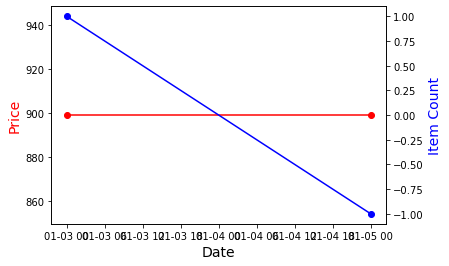

In [29]:
make_plot(train_data,25,2552)